# Figures for ReligiosityVBM

In [1]:
import os.path as op
import nibabel as nib
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.datasets import load_mni152_template
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [ ]:
img_dir = '../bids/derivatives/neurovault'
affine = load_mni152_template().affine

gender_mf_p = nib.load(op.join(img_dir, 'gender_m>f_tfce_corr_tstat.nii.gz')).get_data()
gender_mf_p[gender_mf_p < 0.975] = 0
gender_fm_p = nib.load(op.join(img_dir, 'gender_f>m_tfce_corr_tstat.nii.gz')).get_data()
gender_fm_p[gender_fm_p < 0.975] = 0
gender_mask = (gender_mf_p > 0) + (gender_fm_p > 0)

gender_mf_tstat = nib.load(op.join(img_dir, 'gender_m>f_tstat.nii.gz')).get_data()
gender_mf_tstat[~gender_mask] = 0


out = plotting.plot_stat_map(
    nib.Nifti1Image(gender_mf_tstat, affine),
    draw_cross=False,
    display_mode='x',
    cut_coords=[-60, -40, -20, -10, 0, 10, 20, 40, 90],
    #title='Effect of sex (t-stat)'
);

fig = plt.gcf()
fig.suptitle('Effect of gender', fontsize=30, y=1.10, x=0.05);
out.axes[90.0].ax.texts = []

ax = plt.gca()
ax.annotate(
    r"$\{$",fontsize=50,
    xy=(0.95, 0.65), xycoords='figure fraction'
)

ax.text(s='M > F', x=-18, y=0.7, fontsize=35)

ax.annotate(
    r"$\{$",fontsize=50,
    xy=(0.95, 0.25), xycoords='figure fraction'
)

ax.text(s='F > M', x=-18, y=0.15, fontsize=35)

#fig.savefig('figs/outcome_neutral.png', dpi=200, bbox_inches = "tight")

### ROIS

In [ ]:
rois = sorted(glob('../rois/*prob.nii.gz'))
roi_names = ['Hippoc.', 'IPL', 'MTL', 'OFC']
out = plotting.plot_prob_atlas(
    rois,
    cut_coords=[-50, -35, -20, 20, 35, 50, 90],
    display_mode='x',
    draw_cross=False,
    view_type='contours',
    colorbar=True,
    linewidths=4
)

out.axes[90.0].ax.texts = []
fig = plt.gcf()
fig.axes[-1].texts = []
#fig.axes[-1].set_title('ROI', fontsize=20)
#fig.axes[-1].set_ylabel('test')
ax = fig.axes[-1]
ax.yaxis.set_ticklabels(roi_names, fontsize=20)
ax.set_position([0.90, 0.05, 0.01, 0.905])

In [ ]:
reli_pos_p = nib.load(op.join(img_dir, 'religiosity_pos_tfce_corr_tstat.nii.gz')).get_data()
reli_pos_p[reli_pos_p < 0.95] = 0
reli_neg_p = nib.load(op.join(img_dir, 'religiosity_neg_tfce_corr_tstat.nii.gz')).get_data()
reli_neg_p[reli_neg_p < 0.95] = 0
reli_mask = (reli_pos_p > 0) + (reli_neg_p > 0)

reli_pos_tstat = nib.load(op.join(img_dir, 'religiosity_pos_tstat.nii.gz')).get_data()
reli_pos_tstat[~reli_mask] = 0

out = plotting.plot_stat_map(
    nib.Nifti1Image(reli_pos_tstat, affine),
    draw_cross=False,
    cut_coords=[-60, -40, -20, -10, 0, 10, 20, 40],
    display_mode='x',
    colorbar=True,
)

fig = plt.gcf()
fig.suptitle('Effect of religious belief', fontsize=25, y=1.10, x=0.05);

In [ ]:
mys_pos_p = nib.load(op.join(img_dir, 'mysticalexp_pos_tfce_corr_tstat.nii.gz')).get_data()
mys_pos_p[mys_pos_p < 0.95] = 0
mys_neg_p = nib.load(op.join(img_dir, 'mysticalexp_neg_tfce_corr_tstat.nii.gz')).get_data()
mys_neg_p[mys_neg_p < 0.95] = 0
mys_mask = (mys_pos_p > 0) + (mys_neg_p > 0)

mys_pos_tstat = nib.load(op.join(img_dir, 'mysticalexp_pos_tstat.nii.gz')).get_data()
mys_pos_tstat[~mys_mask] = 0

out = plotting.plot_stat_map(
    nib.Nifti1Image(mys_pos_tstat, affine),
    draw_cross=False,
    cut_coords=[-60, -40, -20, -10, 0, 10, 20, 40],
    display_mode='x',
    colorbar=True,
)

fig = plt.gcf()
fig.suptitle('Effect of mystical experience', fontsize=25, y=1.10, x=0.05);

### exploratory stuff

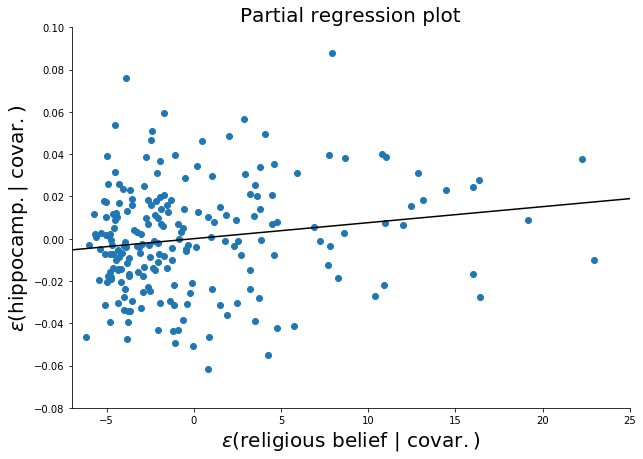

In [41]:
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('../ReligiosityVBM_AllData.csv')
endog = 'Hippocampus_bin'
exog_others = ['age_zscore', 'raven_zscore', 'gender']
exog_i = 'religiosity'
#res1a = OLS(endog, exog_others).fit()
#res1b = OLS(exog_i, exog_others).fit()
#res1c = OLS(res1a.resid, res1b.resid).fit()

sm.graphics.plot_partregress(
    'Hippocampus_bin', 'religiosity', ['age_zscore', 'raven_score_zscore', 'gender'],
    data=df,
    obs_labels=False,
);

fig = plt.gcf()
fig.set_size_inches((10, 7))

ax = plt.gca()
ax.set_title('Partial regression plot', fontsize=20)
ax.set_ylabel(r'$\epsilon\mathrm{(hippocamp. |\ covar.)}$', fontsize=20)
ax.set_xlabel(r'$\epsilon\mathrm{(religious\ belief\ |\ covar.)}$', fontsize=20)
ax.set_xlim(-7, 25)
ax.set_ylim(-0.08, 0.10)
sns.despine()